In [11]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set_palette('deep')
plt.rcParams['text.usetex'] = True

In [12]:
totalsize = [1000001]
V = [0.01]
omega = np.round(np.linspace(0,200,201)[:],2)/10
omega = omega[1:21]
disorder = [2]
phase_divide = np.array([0])
phase_rand = np.array([1])

In [13]:
phase_rand_CORR = phase_rand

In [14]:
p = {}
w = {}
TIME = {}
CORR = {}

ww=0
pp=0

p_noPhase = {}
w_noPhase = {}

tTime=0
cCorr=0

TIME_noPhase = {}
CORR_noPhase = {}


for i in totalsize:
    for j in V:
        for k in omega:
            for l in disorder:
                for m in phase_divide:
                    ww=0
                    pp=0
                    tTime=0
                    cCorr=0
                    for n in phase_rand:
                        w["{0},{1},{2},{3},{4},{5}".format(i,j,k,l,m,n)] = np.load("./data/data_w_(totalsize={0})_(V={1})_(omega={2})_(disorder={3})_(phase_divide={4})_(phase_rand={5}).npy".format(i, j, k, l, m, n)) 
                        p["{0},{1},{2},{3},{4},{5}".format(i,j,k,l,m,n)] = np.load("./data/data_p_(totalsize={0})_(V={1})_(omega={2})_(disorder={3})_(phase_divide={4})_(phase_rand={5}).npy".format(i, j, k, l, m, n))
                        ww += w["{0},{1},{2},{3},{4},{5}".format(i,j,k,l,m,n)]
                        pp += p["{0},{1},{2},{3},{4},{5}".format(i,j,k,l,m,n)]

                    w_noPhase["{0},{1},{2},{3},{4}".format(i,j,k,l,m)] = ww/phase_rand.shape[0]
                    p_noPhase["{0},{1},{2},{3},{4}".format(i,j,k,l,m)] = pp/phase_rand.shape[0]

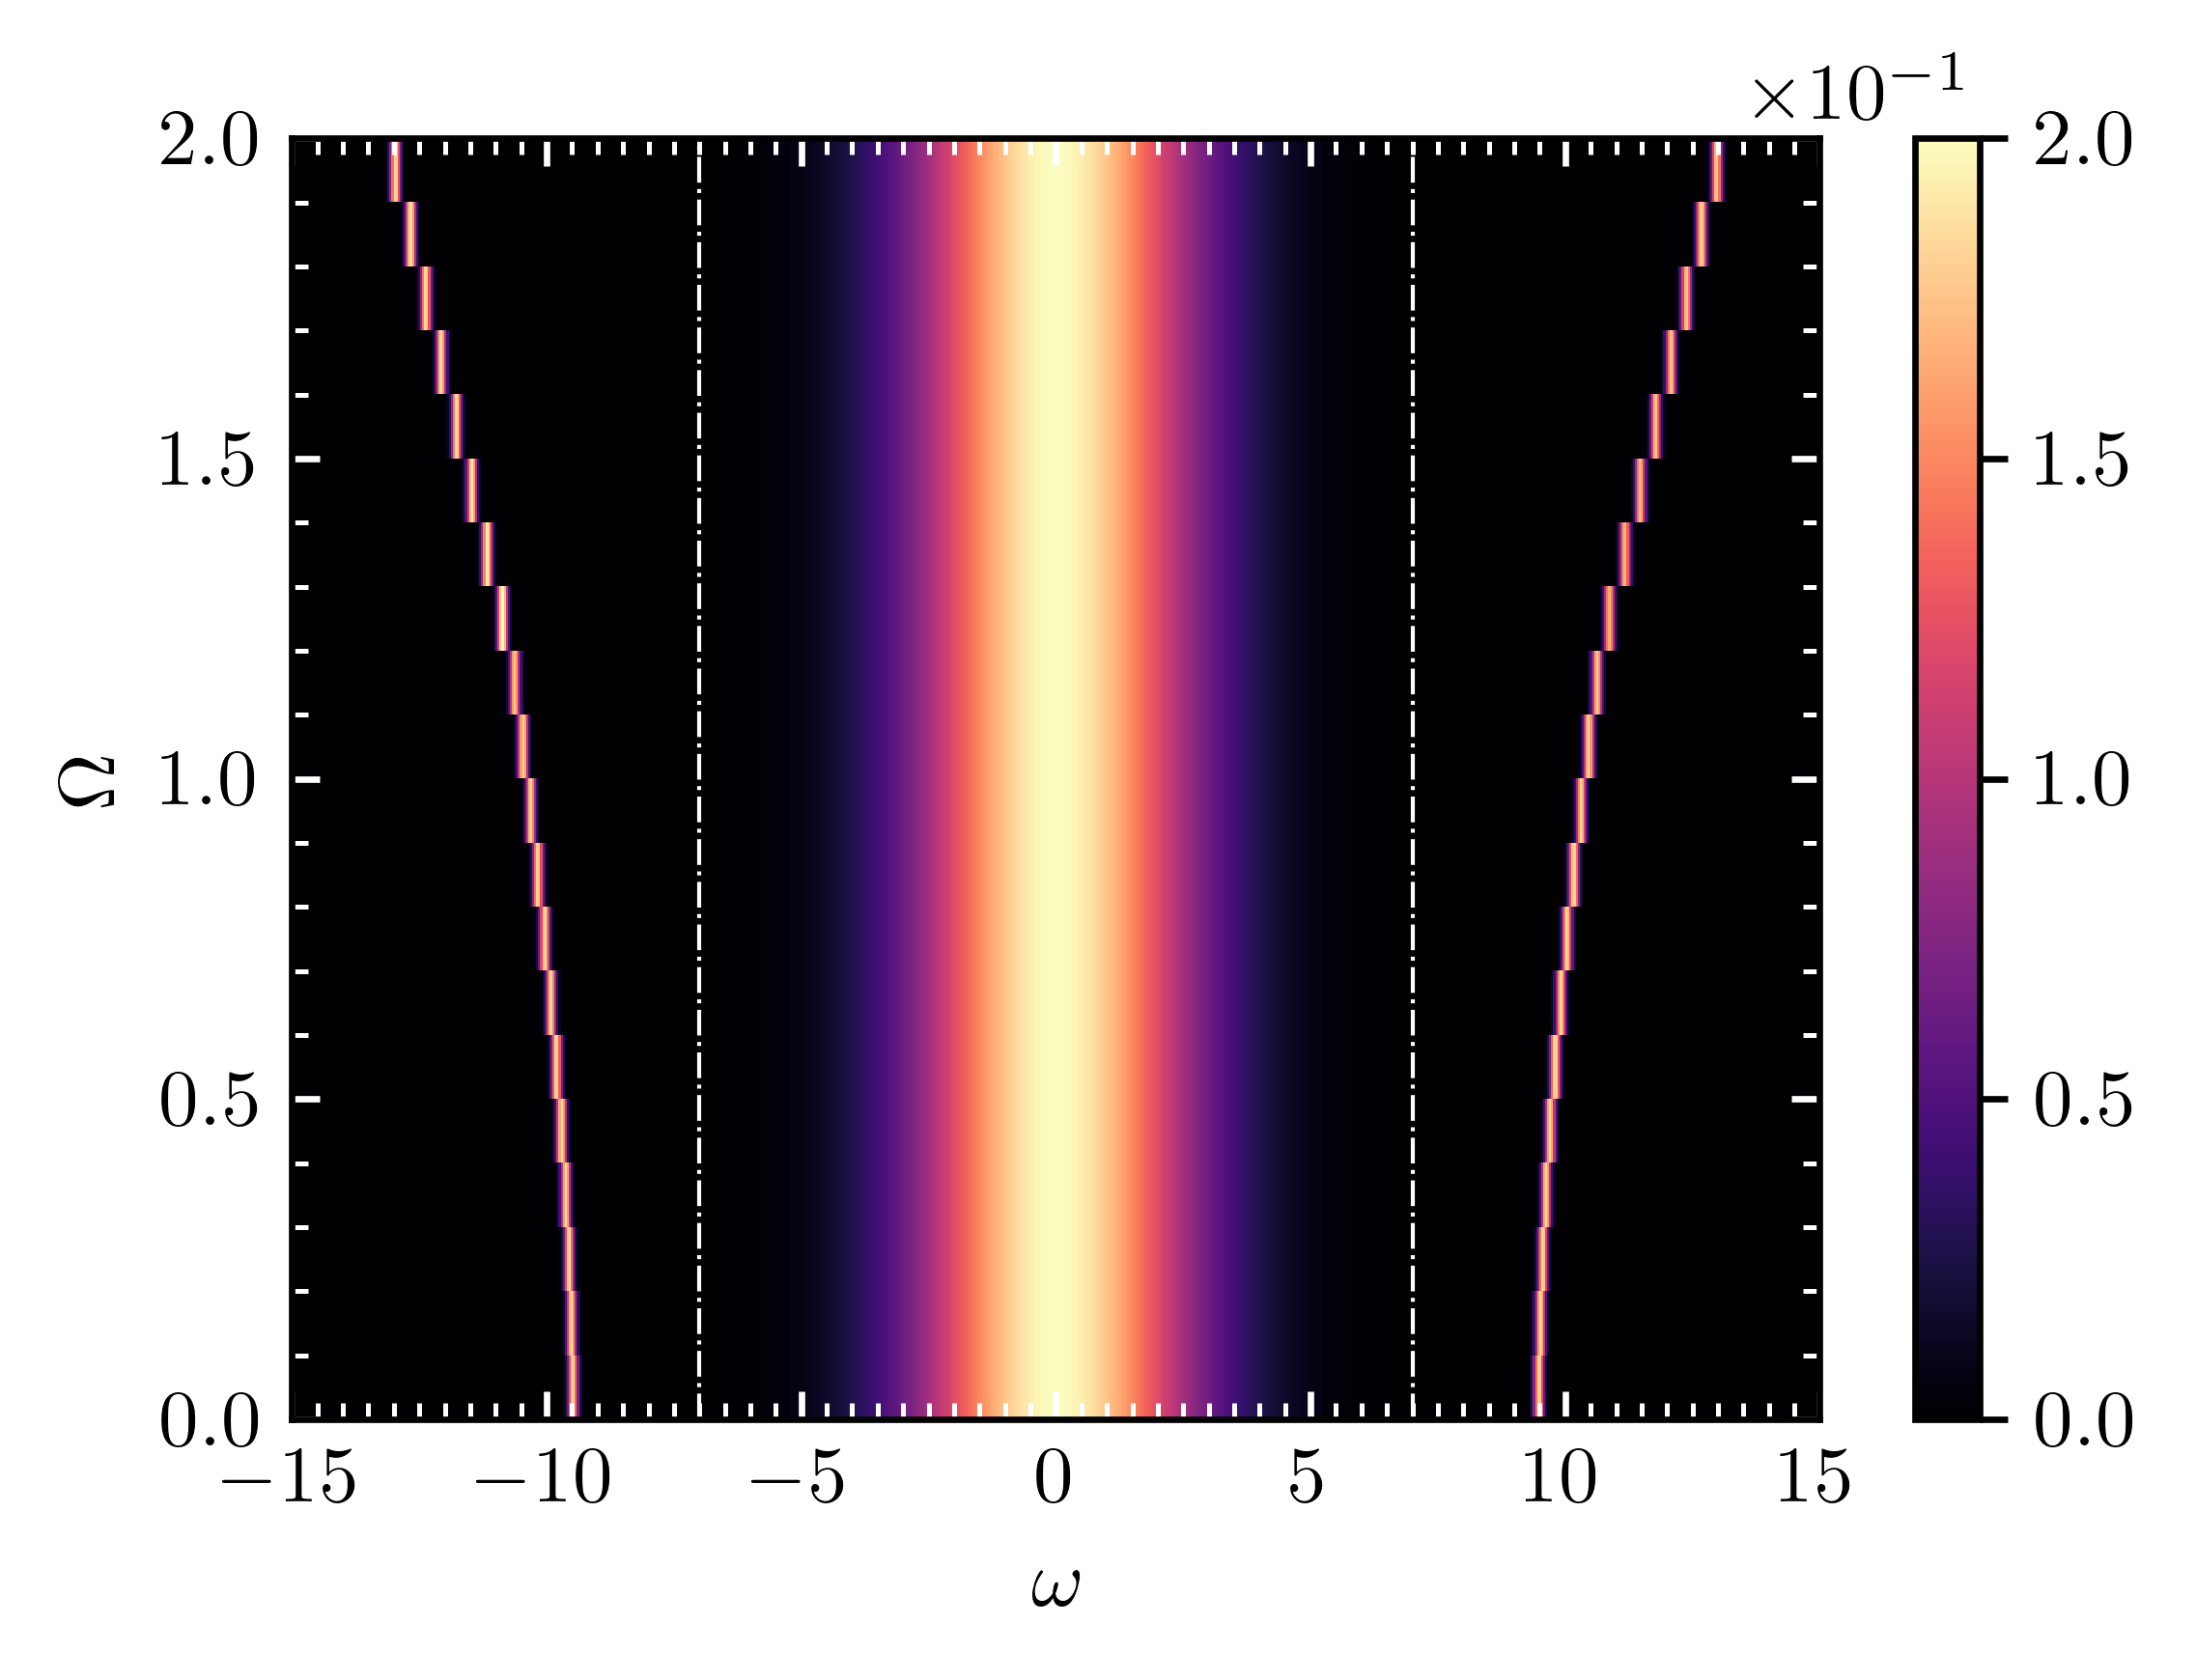

In [15]:
np.random.seed(10)
pp=0
mean = 0  # 均值
std_dev = 2  # 标准差
num_samples = 1000000  # 生成的样本数量

data = np.random.normal(mean, std_dev, num_samples)

pdf_values = norm.pdf(data, mean, std_dev)

xx = np.linspace(-20, 20, 1000)
pp = norm.pdf(xx, mean, std_dev)

X_list = np.linspace(-20,20,1000)


# 生成数据
x = w_noPhase["1000001,0.01,0.1,2,0"]
# params_list = [(mean, std) for mean, std in zip([20, 40, 60, 80], [5, 10, 15, 20])]

# 构建二维矩阵
heatmap_data = np.zeros((20, len(X_list)))

ti=1
for i in range(len(omega)):

# for i in phase_divide:
    heatmap_data[19-i, :] = p_noPhase[f"1000001,0.01,{omega[i]},2,0"]/15 + pp*ti

fig, ax = plt.subplots(figsize=(4, 3),dpi=600)

im = ax.imshow(heatmap_data, cmap='magma', extent=[np.min(X_list), np.max(X_list), 0, 2.0], aspect='auto', interpolation='none') #, interpolation='none' magma 'bicubic'

ax.axvline(x=-7, color='white', linestyle='-.', linewidth=0.5)
ax.axvline(x=7, color='white', linestyle='-.', linewidth=0.5)
minor_locator_x = MultipleLocator(0.5)
minor_locator_y = MultipleLocator(0.1)
ax.xaxis.set_minor_locator(minor_locator_x)
ax.yaxis.set_minor_locator(minor_locator_y)

# 设置纵坐标刻度的位置  
y_major_locator = MultipleLocator(0.5)
ax.yaxis.set_major_locator(y_major_locator)
# 设置图表标题和标签
ax.set_xlabel(r'$\omega$')
ax.set_ylabel(r'$\Omega$')

ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
ax.tick_params(axis='x', which='both', colors='white', labelcolor='black')  # 横坐标刻度线颜色为红色
ax.tick_params(axis='y', which='both', colors='white', labelcolor='black')  # 纵坐标刻度线颜色为蓝色
# 添加颜色条
cbar = plt.colorbar(im)
cbar.mappable.set_clim(0, 0.2) # 这里的参数表示 color bar 的最小值和最大值
cbar.formatter.set_powerlimits((0, 0))
ax.set_xlim(-15,15)
# 显示图形
xmin, xmax = plt.xlim()
plt.tight_layout()
